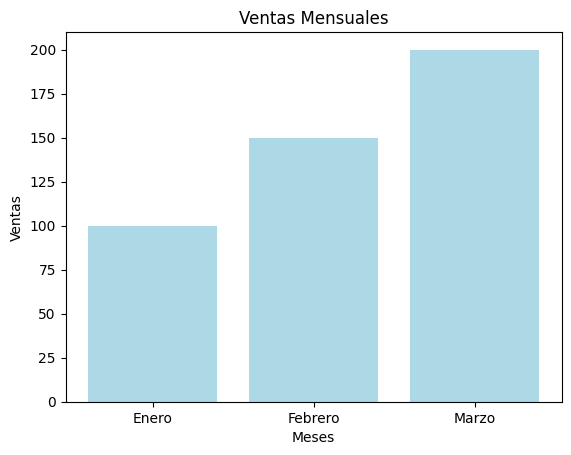

In [1]:
import matplotlib.pyplot as plt

x = ['Enero', 'Febrero', 'Marzo']
y = [100, 150, 200]

plt.bar(x, y, color='lightblue')
plt.title('Ventas Mensuales')
plt.xlabel('Meses')
plt.ylabel('Ventas')
plt.show()


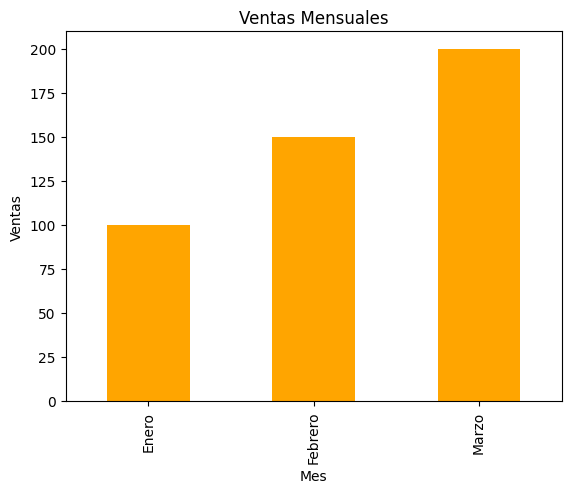

In [2]:
import pandas as pd

data = {'Mes': ['Enero', 'Febrero', 'Marzo'], 'Ventas': [100, 150, 200]}
df = pd.DataFrame(data)

df.plot(kind='bar', x='Mes', y='Ventas', color='orange', legend=False)
plt.title('Ventas Mensuales')
plt.ylabel('Ventas')
plt.show()


In [10]:
from openpyxl import Workbook
from openpyxl.chart import BarChart, Reference
from openpyxl.styles import Font, Color, PatternFill
from openpyxl.drawing.image import Image
import io

# Crear un nuevo libro de trabajo
wb = Workbook()
ws = wb.active

# Agregar datos
data = [
    ['Mes', 'Ventas'],
    ['Enero', 100],
    ['Febrero', 150],
    ['Marzo', 200],
]
for row in data:
    ws.append(row)

# Crear gráfico
chart = BarChart()
chart.add_data(Reference(ws, min_col=2, min_row=1, max_row=4), titles_from_data=True)
chart.set_categories(Reference(ws, min_col=1, min_row=2, max_row=4))

# Personalización del gráfico
chart.title = "Ventas Mensuales"
chart.style = 10  # Estilo del gráfico, hay 48 estilos disponibles (0-47)
chart.x_axis.title = "Meses"
chart.y_axis.title = "Ventas"
chart.y_axis.majorGridlines = None  # Eliminar las líneas de la cuadrícula principal

# Cambiar el color de las barras
chart.series[0].graphicalProperties.fill = PatternFill(start_color="FFFF00", end_color="FFFF00", fill_type="solid")

# Tamaño del gráfico
chart.width = 15  # Ancho
chart.height = 8  # Alto

# Añadir gráfico a la hoja
ws.add_chart(chart, "E5")

# Mejorar la presentación de las celdas de los datos
for row in ws.iter_rows(min_row=1, max_row=4, min_col=1, max_col=2):
    for cell in row:
        cell.font = Font(name='Arial', size=12, bold=True)
        cell.alignment = cell.alignment.copy(horizontal='center', vertical='center')
        cell.border = None
        # Si es una celda con datos, aplicar un color de fondo
        if isinstance(cell.value, (int, float)) and cell.row > 1:
            cell.fill = PatternFill(start_color="B6D7A8", end_color="B6D7A8", fill_type="solid")

# Guardar archivo
wb.save("grafico_ventas_mejorado.xlsx")


C:\Users\Jhack Alberth\AppData\Local\Temp\ipykernel_28416\3782091914.py:47: DeprecationWarning: Call to deprecated function copy (Use copy(obj) or cell.obj = cell.obj + other).
  cell.alignment = cell.alignment.copy(horizontal='center', vertical='center')
